<a href="https://colab.research.google.com/github/romal96/GitActivite/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# We test our model:
x = torch.tensor(2)
forward(x)

x = torch.tensor([2])
forward(x)

x = torch.tensor([[4], [7]])
forward(x)

tensor(7., grad_fn=<AddBackward0>)

**Datas:**

Text(0.5, 0, 'x')

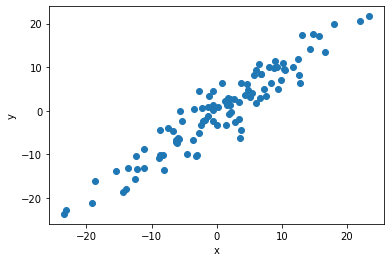

In [0]:
X = torch.randn(100, 1)*10 # "*10" to set up a larger range
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel("x")

Linear model y=wx+b:
- w = slope, weight
- b = bias

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
# we specified thhat we will need the gradient

In [0]:
def forward(x):
  y = w*x + b
  return y

In [0]:
from torch.nn import Linear

In [0]:
torch.manual_seed(1) # use of random values later
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


**Definition of a class for linear regression:**

In [0]:
import torch.nn as nn

In [0]:
class LR(nn.Module): 
  def __init__(self, input_size, output_size): # initializer new instances of this class
    super().__init__()
    self.linear=nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred


In [0]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [0]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [0]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
[w, b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

def get_params():
  return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1+b1
  plt.plot(x1, y1, 'r') # "r" for red 
  plt.scatter(X, y)
  plt.show()


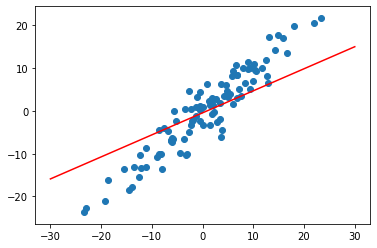

In [0]:
plot_fit("Initial Model")

This is not thhe line that best fits our data ; let us use **gradient descent**!

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # gotta check what are thr advantages of SGD algo



A too large value of Epochs -> Overfitting ; otherwise, Underfitting

In [0]:


epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  optimizer.zero_grad() # set value to 0 as graident is gonna accumulate values...
  loss.backward()
  optimizer.step()


epoch: 0 loss: 28.914575576782227
epoch: 1 loss: 20.61296844482422
epoch: 2 loss: 15.965325355529785
epoch: 3 loss: 13.363329887390137
epoch: 4 loss: 11.906599044799805
epoch: 5 loss: 11.091031074523926
epoch: 6 loss: 10.634418487548828
epoch: 7 loss: 10.378766059875488
epoch: 8 loss: 10.235620498657227
epoch: 9 loss: 10.155462265014648
epoch: 10 loss: 10.110568046569824
epoch: 11 loss: 10.085416793823242
epoch: 12 loss: 10.071319580078125
epoch: 13 loss: 10.063411712646484
epoch: 14 loss: 10.058968544006348
epoch: 15 loss: 10.056467056274414
epoch: 16 loss: 10.055052757263184
epoch: 17 loss: 10.05424690246582
epoch: 18 loss: 10.05378246307373
epoch: 19 loss: 10.053510665893555
epoch: 20 loss: 10.053346633911133
epoch: 21 loss: 10.053242683410645
epoch: 22 loss: 10.053174018859863
epoch: 23 loss: 10.05312442779541
epoch: 24 loss: 10.05308723449707
epoch: 25 loss: 10.053055763244629
epoch: 26 loss: 10.05302906036377
epoch: 27 loss: 10.05300521850586
epoch: 28 loss: 10.052983283996582
ep

Text(0.5, 0, 'epoch')

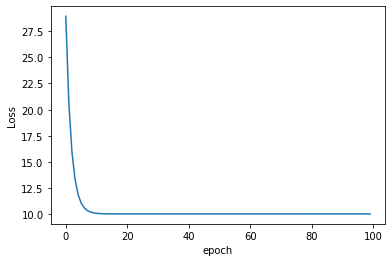

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

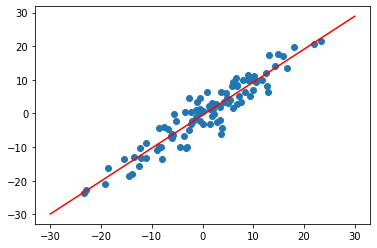

In [0]:
plot_fit("Trained Model")